In [1]:
import sys

import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

if '..' not in sys.path:
    sys.path.append('..')

from utils import tensor_to_plottable
from cnn import Net, train, test

# PreProcessing

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transform,
    ]
)

batch_size = 512

train_set = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transform
)
test_set = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)
test_set, val_set = random_split(test_set, [len(test_set) - 5000, 5000])

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
)

print(f'Train set size: {len(train_set)}')
print(f'Val set size: {len(val_set)}')
print(f'Test set size: {len(test_set)}')

Files already downloaded and verified
Files already downloaded and verified
Train set size: 50000
Val set size: 5000
Test set size: 5000


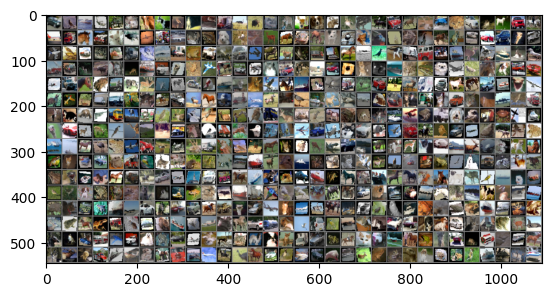

In [3]:
# get some random training images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# show images
plottable = tensor_to_plottable(torchvision.utils.make_grid(images, nrow=32))
plt.imshow(plottable)

# Train

In [4]:
net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
net.to(device)

Using device: cuda:0


Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv13): Conv2d(512, 512, kernel_size=(3, 3), s

In [5]:
n_epochs = 50
train_losses, train_accs, val_losses, val_accs = train(net, device, n_epochs, train_loader, val_loader)

torch.save(net.state_dict(), './checkpoint/vgg16_cifar10.pt')

Epoch 0/50 | train loss: 2.2170 | train acc: 0.1413: : 99it [00:17,  5.58it/s]                      
Epoch 0/50 | val loss: 2.0282 | val acc: 0.2020: : 11it [00:00, 18.28it/s]                      


Epoch 1/50 | train loss: 1.9466 | train acc: 0.2164: : 99it [00:14,  6.70it/s]                      
Epoch 1/50 | val loss: 1.8700 | val acc: 0.2221: : 11it [00:00, 18.12it/s]                      


Epoch 2/50 | train loss: 1.8343 | train acc: 0.2672: : 99it [00:14,  6.63it/s]                      
Epoch 2/50 | val loss: 1.7657 | val acc: 0.2813: : 11it [00:00, 18.56it/s]                      


Epoch 3/50 | train loss: 1.6932 | train acc: 0.3467: : 99it [00:14,  6.65it/s]                      
Epoch 3/50 | val loss: 1.6106 | val acc: 0.3850: : 11it [00:00, 18.39it/s]                      


Epoch 4/50 | train loss: 1.5127 | train acc: 0.4207: : 99it [00:14,  6.64it/s]                      
Epoch 4/50 | val loss: 1.4236 | val acc: 0.4426: : 11it [00:00, 18.61it/s]                      


Epoch 5/50 | train loss: 1.4083 | train acc: 0.4690: : 99it [00:14,  6.66it/s]                      
Epoch 5/50 | val loss: 1.2886 | val acc: 0.5171: : 11it [00:00, 17.76it/s]                      


Epoch 6/50 | train loss: 1.2929 | train acc: 0.5208: : 99it [00:14,  6.75it/s]                      
Epoch 6/50 | val loss: 1.1676 | val acc: 0.5832: : 11it [00:00, 17.98it/s]                      


Epoch 7/50 | train loss: 1.1845 | train acc: 0.5694: : 99it [00:14,  6.72it/s]                      
Epoch 7/50 | val loss: 1.1035 | val acc: 0.6083: : 11it [00:00, 17.88it/s]                      


Epoch 8/50 | train loss: 1.1206 | train acc: 0.5989: : 99it [00:14,  6.66it/s]                      
Epoch 8/50 | val loss: 1.0457 | val acc: 0.6412: : 11it [00:00, 17.73it/s]                      


Epoch 9/50 | train loss: 1.0578 | train acc: 0.6274: : 99it [00:14,  6.66it/s]                      
Epoch 9/50 | val loss: 0.9441 | val acc: 0.6735: : 11it [00:00, 18.31it/s]                      


Epoch 10/50 | train loss: 0.9783 | train acc: 0.6563: : 99it [00:14,  6.66it/s]                      
Epoch 10/50 | val loss: 0.8881 | val acc: 0.6961: : 11it [00:00, 18.21it/s]                      


Epoch 11/50 | train loss: 0.9478 | train acc: 0.6704: : 99it [00:15,  6.57it/s]                      
Epoch 11/50 | val loss: 0.8540 | val acc: 0.7083: : 11it [00:00, 17.82it/s]                      


Epoch 12/50 | train loss: 0.8916 | train acc: 0.6874: : 99it [00:14,  6.60it/s]                      
Epoch 12/50 | val loss: 0.7880 | val acc: 0.7373: : 11it [00:00, 17.47it/s]                      


Epoch 13/50 | train loss: 0.8592 | train acc: 0.7028: : 99it [00:15,  6.57it/s]                      
Epoch 13/50 | val loss: 0.8277 | val acc: 0.7213: : 11it [00:00, 17.74it/s]                      


Epoch 14/50 | train loss: 0.8347 | train acc: 0.7110: : 99it [00:15,  6.58it/s]                      
Epoch 14/50 | val loss: 0.8063 | val acc: 0.7357: : 11it [00:00, 18.17it/s]                      


Epoch 15/50 | train loss: 0.8027 | train acc: 0.7259: : 99it [00:15,  6.60it/s]                      
Epoch 15/50 | val loss: 0.7242 | val acc: 0.7633: : 11it [00:00, 17.17it/s]                      


Epoch 16/50 | train loss: 0.7683 | train acc: 0.7375: : 99it [00:15,  6.58it/s]                      
Epoch 16/50 | val loss: 0.7455 | val acc: 0.7514: : 11it [00:00, 18.15it/s]                      


Epoch 17/50 | train loss: 0.7623 | train acc: 0.7406: : 99it [00:15,  6.53it/s]                      
Epoch 17/50 | val loss: 0.7056 | val acc: 0.7700: : 11it [00:00, 17.72it/s]                      


Epoch 18/50 | train loss: 0.7311 | train acc: 0.7516: : 99it [00:15,  6.59it/s]                      
Epoch 18/50 | val loss: 0.6755 | val acc: 0.7760: : 11it [00:00, 18.04it/s]                      


Epoch 19/50 | train loss: 0.6977 | train acc: 0.7626: : 99it [00:15,  6.58it/s]                      
Epoch 19/50 | val loss: 0.6796 | val acc: 0.7817: : 11it [00:00, 17.56it/s]                      


Epoch 20/50 | train loss: 0.6767 | train acc: 0.7679: : 99it [00:15,  6.53it/s]                      
Epoch 20/50 | val loss: 0.6496 | val acc: 0.7894: : 11it [00:00, 17.28it/s]                      


Epoch 21/50 | train loss: 0.6624 | train acc: 0.7757: : 99it [00:15,  6.52it/s]                      
Epoch 21/50 | val loss: 0.6582 | val acc: 0.7847: : 11it [00:00, 18.48it/s]                      


Epoch 22/50 | train loss: 0.6486 | train acc: 0.7790: : 99it [00:15,  6.53it/s]                      
Epoch 22/50 | val loss: 0.6493 | val acc: 0.7880: : 11it [00:00, 18.05it/s]                      


Epoch 23/50 | train loss: 0.6379 | train acc: 0.7850: : 99it [00:15,  6.57it/s]                      
Epoch 23/50 | val loss: 0.6162 | val acc: 0.8069: : 11it [00:00, 18.42it/s]                      


Epoch 24/50 | train loss: 0.6322 | train acc: 0.7869: : 99it [00:15,  6.50it/s]                      
Epoch 24/50 | val loss: 0.6744 | val acc: 0.7892: : 11it [00:00, 18.44it/s]                      


Epoch 25/50 | train loss: 0.6279 | train acc: 0.7889: : 99it [00:15,  6.50it/s]                      
Epoch 25/50 | val loss: 0.6052 | val acc: 0.8061: : 11it [00:00, 18.08it/s]                      


Epoch 26/50 | train loss: 0.6046 | train acc: 0.7970: : 99it [00:15,  6.52it/s]                      
Epoch 26/50 | val loss: 0.6090 | val acc: 0.8100: : 11it [00:00, 17.10it/s]                      


Epoch 27/50 | train loss: 0.6021 | train acc: 0.7971: : 99it [00:15,  6.52it/s]                      
Epoch 27/50 | val loss: 0.5934 | val acc: 0.8201: : 11it [00:00, 17.99it/s]                      


Epoch 28/50 | train loss: 0.5787 | train acc: 0.8059: : 99it [00:15,  6.55it/s]                      
Epoch 28/50 | val loss: 0.5792 | val acc: 0.8179: : 11it [00:00, 18.06it/s]                      


Epoch 29/50 | train loss: 0.5674 | train acc: 0.8094: : 99it [00:15,  6.51it/s]                      
Epoch 29/50 | val loss: 0.5966 | val acc: 0.8121: : 11it [00:00, 17.93it/s]                      


Epoch 30/50 | train loss: 0.5503 | train acc: 0.8160: : 99it [00:15,  6.53it/s]                      
Epoch 30/50 | val loss: 0.5523 | val acc: 0.8232: : 11it [00:00, 18.20it/s]                      


Epoch 31/50 | train loss: 0.5425 | train acc: 0.8172: : 99it [00:15,  6.48it/s]                      
Epoch 31/50 | val loss: 0.5598 | val acc: 0.8223: : 11it [00:00, 17.72it/s]                      


Epoch 32/50 | train loss: 0.5337 | train acc: 0.8207: : 99it [00:15,  6.47it/s]                      
Epoch 32/50 | val loss: 0.5497 | val acc: 0.8218: : 11it [00:00, 18.14it/s]                      


Epoch 33/50 | train loss: 0.5290 | train acc: 0.8244: : 99it [00:15,  6.50it/s]                      
Epoch 33/50 | val loss: 0.5688 | val acc: 0.8169: : 11it [00:00, 17.96it/s]                      


Epoch 34/50 | train loss: 0.5251 | train acc: 0.8253: : 99it [00:15,  6.51it/s]                      
Epoch 34/50 | val loss: 0.5579 | val acc: 0.8244: : 11it [00:00, 18.31it/s]                      


Epoch 35/50 | train loss: 0.5224 | train acc: 0.8252: : 99it [00:15,  6.48it/s]                      
Epoch 35/50 | val loss: 0.5237 | val acc: 0.8321: : 11it [00:00, 17.29it/s]                      


Epoch 36/50 | train loss: 0.5024 | train acc: 0.8311: : 99it [00:15,  6.48it/s]                      
Epoch 36/50 | val loss: 0.5589 | val acc: 0.8295: : 11it [00:00, 16.67it/s]                      


Epoch 37/50 | train loss: 0.4963 | train acc: 0.8361: : 99it [00:15,  6.50it/s]                      
Epoch 37/50 | val loss: 0.5340 | val acc: 0.8319: : 11it [00:00, 18.04it/s]                      


Epoch 38/50 | train loss: 0.4772 | train acc: 0.8424: : 99it [00:15,  6.46it/s]                      
Epoch 38/50 | val loss: 0.5326 | val acc: 0.8382: : 11it [00:00, 17.90it/s]                      


Epoch 39/50 | train loss: 0.4942 | train acc: 0.8342: : 99it [00:15,  6.51it/s]                      
Epoch 39/50 | val loss: 0.5293 | val acc: 0.8325: : 11it [00:00, 17.30it/s]                      


Epoch 40/50 | train loss: 0.4815 | train acc: 0.8403: : 99it [00:15,  6.53it/s]                      
Epoch 40/50 | val loss: 0.5263 | val acc: 0.8366: : 11it [00:00, 17.19it/s]                      


Epoch 41/50 | train loss: 0.4644 | train acc: 0.8460: : 99it [00:15,  6.45it/s]                      
Epoch 41/50 | val loss: 0.5258 | val acc: 0.8377: : 11it [00:00, 17.39it/s]                      


Epoch 42/50 | train loss: 0.4683 | train acc: 0.8444: : 99it [00:15,  6.50it/s]                      
Epoch 42/50 | val loss: 0.5412 | val acc: 0.8345: : 11it [00:00, 17.43it/s]                      


Epoch 43/50 | train loss: 0.4569 | train acc: 0.8475: : 99it [00:15,  6.54it/s]                      
Epoch 43/50 | val loss: 0.5281 | val acc: 0.8369: : 11it [00:00, 17.72it/s]                      


Epoch 44/50 | train loss: 0.4561 | train acc: 0.8485: : 99it [00:15,  6.59it/s]                      
Epoch 44/50 | val loss: 0.5185 | val acc: 0.8400: : 11it [00:00, 18.33it/s]                      


Epoch 45/50 | train loss: 0.4484 | train acc: 0.8512: : 99it [00:15,  6.51it/s]                      
Epoch 45/50 | val loss: 0.5725 | val acc: 0.8313: : 11it [00:00, 17.96it/s]                      


Epoch 46/50 | train loss: 0.4397 | train acc: 0.8541: : 99it [00:15,  6.49it/s]                      
Epoch 46/50 | val loss: 0.5180 | val acc: 0.8442: : 11it [00:00, 17.62it/s]                      


Epoch 47/50 | train loss: 0.4349 | train acc: 0.8552: : 99it [00:15,  6.48it/s]                      
Epoch 47/50 | val loss: 0.4815 | val acc: 0.8503: : 11it [00:00, 17.68it/s]                      


Epoch 48/50 | train loss: 0.4297 | train acc: 0.8579: : 99it [00:15,  6.44it/s]                      
Epoch 48/50 | val loss: 0.4886 | val acc: 0.8448: : 11it [00:00, 17.87it/s]                      


Epoch 49/50 | train loss: 0.4260 | train acc: 0.8590: : 99it [00:15,  6.47it/s]                      
Epoch 49/50 | val loss: 0.4989 | val acc: 0.8482: : 11it [00:00, 18.33it/s]                      


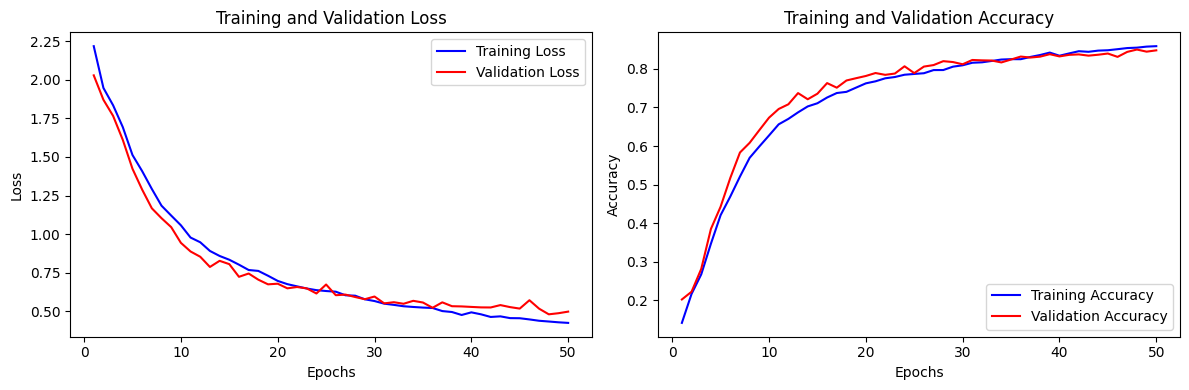

In [6]:
epochs = range(1, n_epochs + 1)

# Plotting losses
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, 'b', label='Training Accuracy')
plt.plot(epochs, val_accs, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Test

In [7]:
net = Net()
net.load_state_dict(torch.load('./checkpoint/vgg16_cifar10.pt'))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv13): Conv2d(512, 512, kernel_size=(3, 3), s

In [8]:
ytrue, ypred = test(net, device, test_loader)

100%|██████████| 10/10 [00:00<00:00, 16.65it/s]


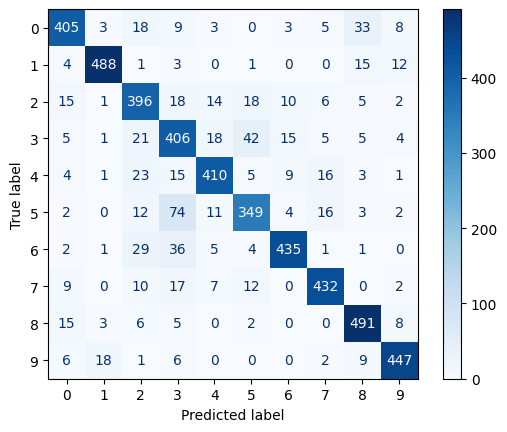

In [9]:
ConfusionMatrixDisplay.from_predictions(ytrue, ypred, cmap=plt.cm.Blues)

In [10]:
print(classification_report(ytrue, ypred, target_names=classes))

              precision    recall  f1-score   support

       plane       0.87      0.83      0.85       487
         car       0.95      0.93      0.94       524
        bird       0.77      0.82      0.79       485
         cat       0.69      0.78      0.73       522
        deer       0.88      0.84      0.86       487
         dog       0.81      0.74      0.77       473
        frog       0.91      0.85      0.88       514
       horse       0.89      0.88      0.89       489
        ship       0.87      0.93      0.90       530
       truck       0.92      0.91      0.92       489

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

